In this notebook a small ablation into the availability of the dataset images in the retrieval dataset. For example whether it is able to depict the image of the city canberra, in order to determine wheter performance is due to absence of certain images for retrieval.

### Load in packages

In [1]:
import numpy as np
import copy
import torch
import pickle
from transformers import logging
logging.set_verbosity_error()

from PIL import Image
#!pip install matplotlib
import matplotlib.pyplot as plt

import sys
sys.path.insert(1,"..")

from src.fromage_inf.fromage import models
from src.fromage_inf.fromage import utils

In [2]:
def trunc_caption(caption: str) -> str:
    # Truncate at period.
    trunc_index = caption.find('.') + 1
    if trunc_index < 0:
        trunc_index = caption.find('\n') + 1
    caption = caption[:trunc_index]
    return caption

def display_interleaved_outputs(model_outputs, one_img_per_ret=True):
    for output in model_outputs:
        if type(output) == str:
            print(output)
        elif type(output) == list:
            # Use this to display the single prompt image
            if one_img_per_ret:
                image = Image.open("../benchmark/" + output[0] + ".jpg")
                image = image.resize((224, 224))
                image = image.convert('RGB')
                display(image)
            # Use this to display the RET image/s
            else:
                fig, ax = plt.subplots(1, len(output), figsize=(3 * len(output), 3))
                for i, (img, k) in enumerate(output):
                    image = np.array(img)
                    ax[i].imshow(img)
                    ax[i].set_title(f'Retrieval #{i+1} - K #{k+1}')
                plt.show()


# Load model used in the paper.
model_dir = '../src/fromage_inf/fromage_model/'
model = models.load_fromage(model_dir)

# Load the relations dictionary to make the relations.
relations = pickle.load(open("../src/code/relations_dict.pkl", "rb"))

Using facebook/opt-6.7b for the language model.
Freezing the LM.
Initializing embedding for the retrieval token [RET] (id = 50266).


### Retrieve all dataset images

Prompt:
Image of facebook the companie
[RET]
Model generated outputs:


TypeError: cannot unpack non-iterable Image object

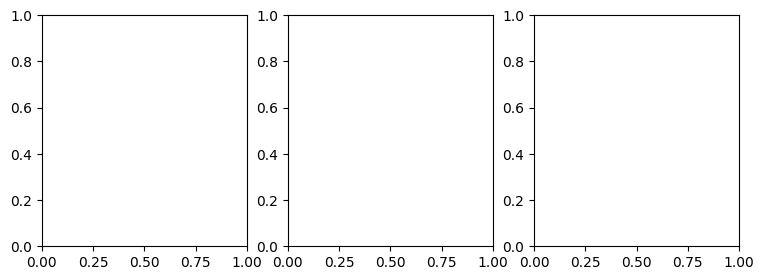

In [3]:
already_prompted = []

for values in relations.values():
    for relation in values:
        for image in relation:
            # 
            if image not in already_prompted:
                already_prompted.append(image)
                r = image.split("/")
                prompt = ["Image of {} the {}".format(r[1].replace("_"," "), r[0].replace("s","")), "[RET]"]

                print('Prompt:')
                display_interleaved_outputs(prompt)
                print('=' * 30)
                model_outputs = model.generate_for_images_and_texts(prompt, max_img_per_ret=3)

                # Display outputs.
                print('Model generated outputs:')
                display_interleaved_outputs(model_outputs, one_img_per_ret=False)